In [13]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
# plt.style.use('default')
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd

# Import dataset
dataset = pd.read_csv('TEST-DATA.csv')

# Kelompokkan data berdasarkan label
grouped_data = dataset.groupby('label')

# Tampilkan 5 data pertama dari setiap label
for label, label_data in grouped_data:
  print(f"\nLabel: {label}")
  print(label_data.head().to_string(index=False))


Label: DDOS_ICMP
 datapath_id  version  header_length  tos  total_length  flags  offset  ttl  proto  csum         src_ip   dst_ip  src_port  dst_port  tcp_flag  type_icmp  code_icmp  csum_icmp  port_no  rx_bytes_ave  rx_error_ave  rx_dropped_ave  tx_bytes_ave  tx_error_ave  tx_dropped_ave     label
           1        4              5    0            28      0       0  250      1 38973  217.130.69.28 10.0.0.4         0         0         0          8        153      63162        1            42             0               0           119             0               0 DDOS_ICMP
           1        4              5    0            28      0       0  250      1  4617 165.116.255.94 10.0.0.4         0         0         0          8        191      62936        1            42             0               0           119             0               0 DDOS_ICMP
           1        4              5    0            28      0       0  250      1  7768 130.149.21.239 10.0.0.4         0         0 

In [3]:
# Check the features
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   datapath_id     180000 non-null  int64 
 1   version         180000 non-null  int64 
 2   header_length   180000 non-null  int64 
 3   tos             180000 non-null  int64 
 4   total_length    180000 non-null  int64 
 5   flags           180000 non-null  int64 
 6   offset          180000 non-null  int64 
 7   ttl             180000 non-null  int64 
 8   proto           180000 non-null  int64 
 9   csum            180000 non-null  int64 
 10  src_ip          180000 non-null  object
 11  dst_ip          180000 non-null  object
 12  src_port        180000 non-null  int64 
 13  dst_port        180000 non-null  int64 
 14  tcp_flag        180000 non-null  int64 
 15  type_icmp       180000 non-null  int64 
 16  code_icmp       180000 non-null  int64 
 17  csum_icmp       180000 non-nu

In [4]:
# menampilkan informasi statistik dataset
dataset.describe()

,datapath_id,version,header_length,tos,total_length,flags,offset,ttl,proto,csum,...,type_icmp,code_icmp,csum_icmp,port_no,rx_bytes_ave,rx_error_ave,rx_dropped_ave,tx_bytes_ave,tx_error_ave,tx_dropped_ave
count,180000.0,180000.0,180000.0,180000.0,180000.000000,180000.0,180000.0,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.0,180000.000000,180000.0,180000.0,180000.000000,180000.0,180000.0
mean,1.0,4.0,5.0,0.0,38.666667,0.0,0.0,126.000000,8.000000,29564.712244,...,7.334978,87.510856,63440.040489,1.0,49.099694,0.0,0.0,114.260744,0.0,0.0
std,0.0,0.0,0.0,0.0,9.159113,0.0,0.0,87.681484,6.683331,13770.203249,...,2.208608,95.591271,569.065770,0.0,4.194127,0.0,0.0,1.510685,0.0,0.0
min,1.0,4.0,5.0,0.0,28.000000,0.0,0.0,64.000000,1.000000,0.000000,...,0.000000,0.000000,62724.000000,1.0,42.000000,0.0,0.0,113.000000,0.0,0.0
25%,1.0,4.0,5.0,0.0,28.000000,0.0,0.0,64.000000,1.000000,26302.000000,...,8.000000,0.000000,63268.000000,1.0,45.000000,0.0,0.0,113.000000,0.0,0.0
50%,1.0,4.0,5.0,0.0,40.000000,0.0,0.0,64.000000,6.000000,26316.000000,...,8.000000,0.000000,63268.000000,1.0,51.000000,0.0,0.0,113.000000,0.0,0.0
75%,1.0,4.0,5.0,0.0,41.000000,0.0,0.0,250.000000,17.000000,32856.000000,...,8.000000,199.000000,63373.000000,1.0,52.000000,0.0,0.0,115.000000,0.0,0.0
max,1.0,4.0,5.0,0.0,55.000000,0.0,0.0,250.000000,17.000000,65534.000000,...,8.000000,255.000000,65535.000000,1.0,54.000000,0.0,0.0,119.000000,0.0,0.0


In [5]:
#drop column dikarenakan data setiap fitur tidak mengelompok atau tersebar jauh dari pusat kelompok (mean).
columns_to_drop = ['tos', 'flags', 'offset', 'code_icmp', 'rx_error_ave', 'rx_dropped_ave', 'tx_error_ave', 'tx_dropped_ave']
dataset = dataset.drop(columns=columns_to_drop)

In [6]:
#drop column dikarenakan bertipe object
columns_to_drop = ['src_ip', 'dst_ip']
dataset = dataset.drop(columns=columns_to_drop)


In [7]:
# Check the dataset if there's NaN value
print(dataset.isna().values.any())

False


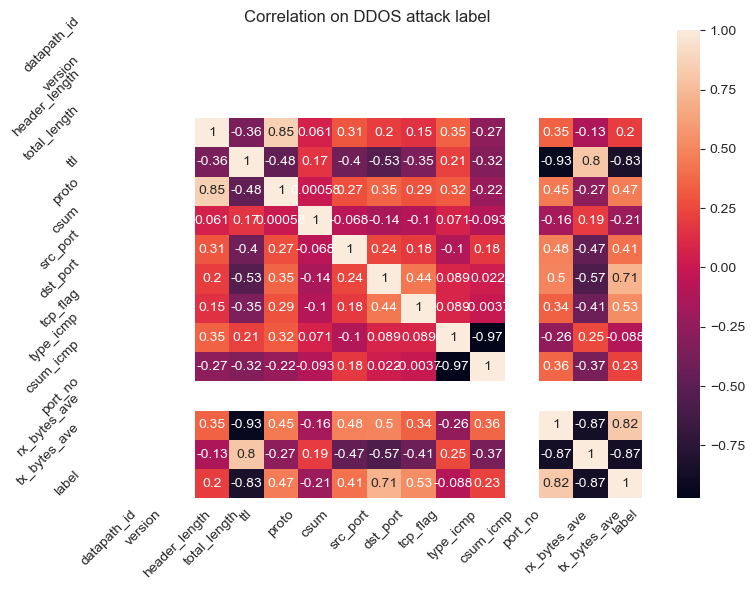

In [8]:
# Mengganti kolom label string
iris = dataset.replace(
{"label": {"DDOS_ICMP": 1, "DDOS_TCP": 2, "DDOS_UDP": 3, "NORMAL_ICMP": 4, "NORMAL_TCP": 5, "NORMAL_UDP": 6}})
# menampilkan heatmap (correlation matrix)
plt.figure(figsize=(8, 6))  
sns.heatmap(iris.corr(numeric_only=True), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Correlation on DDOS attack label")
plt.tight_layout()
plt.show()

In [9]:

# Calculate the correlation matrix directly
correlation_matrix = iris.corr()

# Convert correlation matrix to a flat Series
corr_values = correlation_matrix.stack()

# Sort by absolute correlation (descending order)
sorted_corr = corr_values.abs().sort_values(ascending=False)

# Print the most correlated features
print("From top to the least Correlated Features:")
for feature, correlation in sorted_corr[:50].items():
    print(f"{feature}: {correlation:.3f}")


From top to the least Correlated Features:
('total_length', 'total_length'): 1.000
('ttl', 'ttl'): 1.000
('tx_bytes_ave', 'tx_bytes_ave'): 1.000
('rx_bytes_ave', 'rx_bytes_ave'): 1.000
('csum_icmp', 'csum_icmp'): 1.000
('type_icmp', 'type_icmp'): 1.000
('tcp_flag', 'tcp_flag'): 1.000
('dst_port', 'dst_port'): 1.000
('src_port', 'src_port'): 1.000
('csum', 'csum'): 1.000
('proto', 'proto'): 1.000
('label', 'label'): 1.000
('csum_icmp', 'type_icmp'): 0.974
('type_icmp', 'csum_icmp'): 0.974
('ttl', 'rx_bytes_ave'): 0.932
('rx_bytes_ave', 'ttl'): 0.932
('tx_bytes_ave', 'label'): 0.873
('label', 'tx_bytes_ave'): 0.873
('rx_bytes_ave', 'tx_bytes_ave'): 0.872
('tx_bytes_ave', 'rx_bytes_ave'): 0.872
('total_length', 'proto'): 0.849
('proto', 'total_length'): 0.849
('ttl', 'label'): 0.828
('label', 'ttl'): 0.828
('label', 'rx_bytes_ave'): 0.815
('rx_bytes_ave', 'label'): 0.815
('ttl', 'tx_bytes_ave'): 0.802
('tx_bytes_ave', 'ttl'): 0.802
('dst_port', 'label'): 0.714
('label', 'dst_port'): 0.714

<Figure size 800x800 with 0 Axes>

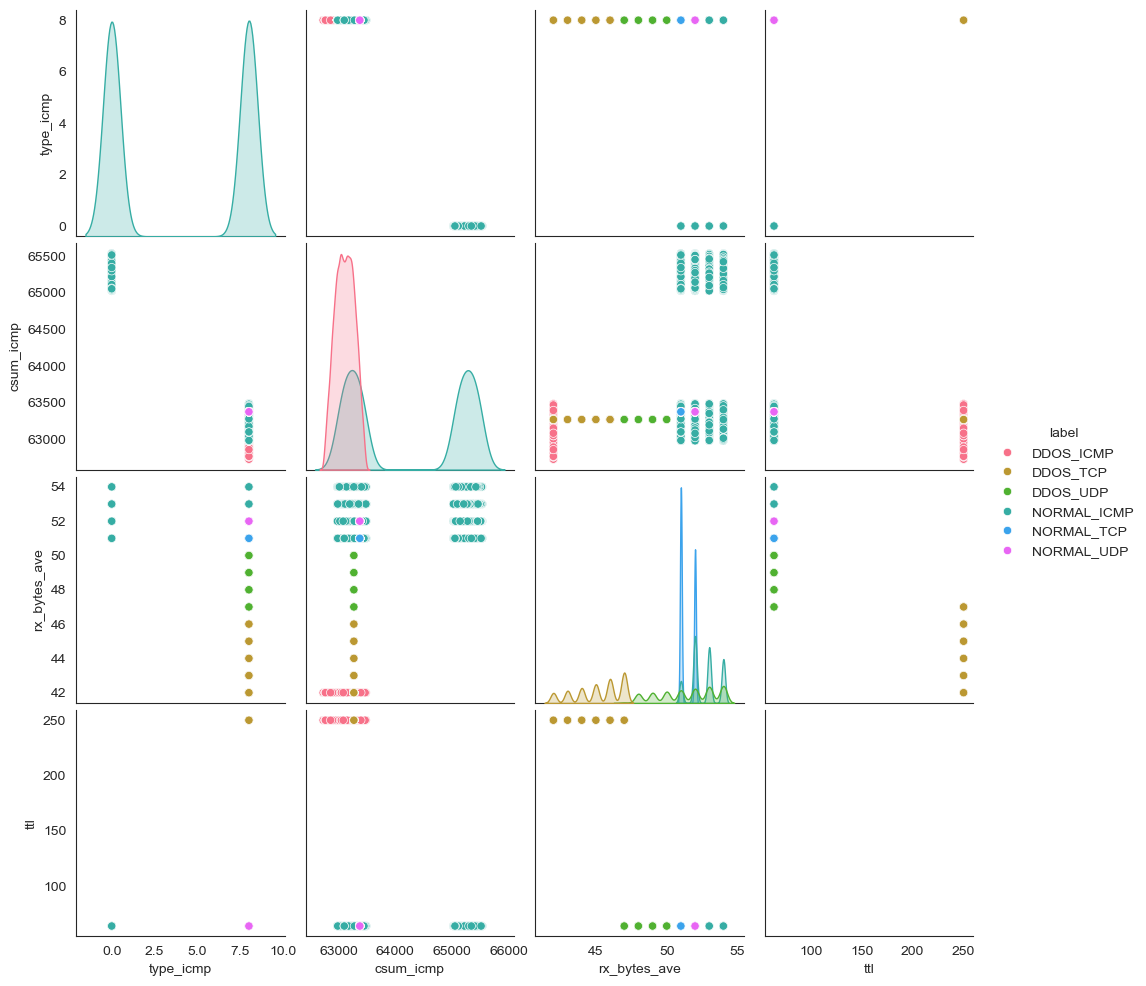

In [10]:
# Pilih kolom 
kolom= ['type_icmp', 'csum_icmp', 'rx_bytes_ave', 'ttl','label']

# Buat matriks plotting
plt.figure(figsize=(8, 8))
ax = sns.pairplot(dataset[kolom], hue='label')

# Tampilkan plot
plt.show()

In [11]:
# Save preprocessed data to a CSV file
dataset.to_csv('preprocessed_test_datasets.csv', index=False)
print("Preprocessed data saved to preprocessed_test_datasets.csv")

Preprocessed data saved to preprocessed_test_datasets.csv


In [12]:
print(dataset.columns)


Index(['datapath_id', 'version', 'header_length', 'total_length', 'ttl',
       'proto', 'csum', 'src_port', 'dst_port', 'tcp_flag', 'type_icmp',
       'csum_icmp', 'port_no', 'rx_bytes_ave', 'tx_bytes_ave', 'label'],
      dtype='object')
